In [1]:
import pandas as pd
import os

In [2]:
carpeta1="MesJunio"
carpeta2="MesJulio"

In [3]:
def listar_archivos_csv(carpeta):
    return [os.path.join(carpeta,archivo) for archivo 
            in os.listdir(carpeta) if 
            archivo.endswith('.csv')]

In [4]:
archivos_carpeta1=listar_archivos_csv(carpeta1)
archivos_carpeta2=listar_archivos_csv(carpeta2)

In [5]:
archivos_csv=archivos_carpeta1+archivos_carpeta2

In [6]:
dataframes=[pd.read_csv(archivo) for archivo in archivos_csv]

In [7]:
df_conbinado=pd.concat(dataframes,ignore_index=True)

In [8]:
df_conbinado

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))"
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.87340,-102.26918
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.87340,-102.26918
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.87340,-102.26918
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.87340,-102.26918
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.87340,-102.26918
...,...,...,...,...,...,...,...,...,...,...
79027243,2024-07-31,19:00,310510,9,3,activo,1726211064,159879744,24.69471,-101.25723
79027244,2024-07-31,20:00,310510,9,3,activo,2751037976,152066632,24.69471,-101.25723
79027245,2024-07-31,21:00,310510,9,3,activo,6808617192,230105168,24.69471,-101.25723
79027246,2024-07-31,22:00,310510,9,3,activo,7475452936,253532920,24.69471,-101.25723


In [9]:
df_conbinado['Mb_dl']=df_conbinado['l_thrp_bits_dl']/1000000
df_conbinado['Mb_ul']=df_conbinado['l_thrp_bits_ul']/1000000
df_conbinado['totalMb']=df_conbinado['Mb_dl']+df_conbinado['Mb_ul']
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [10]:
hora=df_conbinado.groupby('hora').agg({'totalMb':'sum'}).reset_index()

In [11]:
hora.head()

,hora,totalMb
0,00:00,5.010793e+10
1,01:00,3.441816e+10
2,02:00,2.365514e+10
3,03:00,1.781684e+10
4,04:00,1.644888e+10


In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
horadl=df_conbinado.groupby('hora').agg({'Mb_dl':'sum'}).reset_index()

In [15]:
horaul=df_conbinado.groupby('hora').agg({'Mb_ul':'sum'}).reset_index()

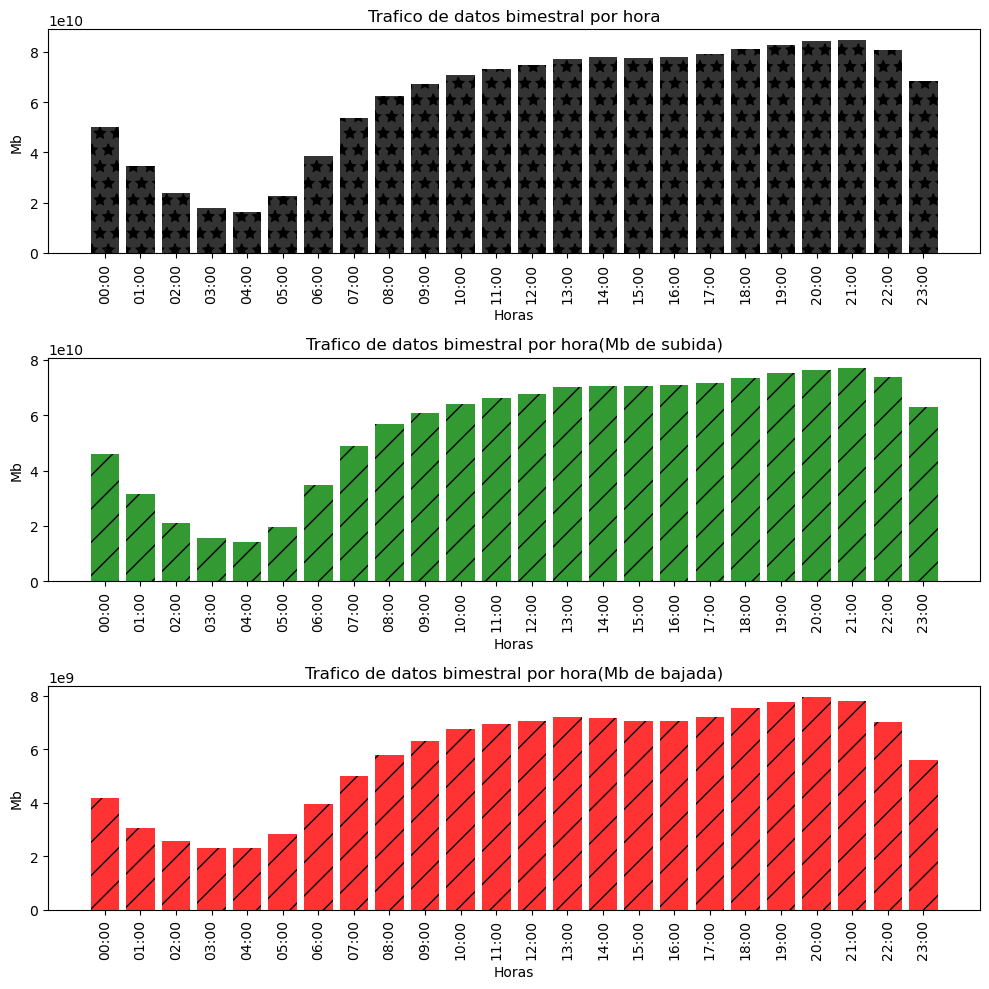

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.bar(hora['hora'],hora['totalMb'],width=0.8,color='black',alpha=0.8,hatch='*')
#plt.ylim(35.20,36.95)
plt.title('Trafico de datos bimestral por hora')
plt.xlabel('Horas')
plt.ylabel('Mb')
plt.xticks(rotation=90) 

plt.subplot(3,1,2)
plt.bar(horadl['hora'],horadl['Mb_dl'],width=0.8,color='green',alpha=0.8,hatch='/')
#plt.ylim(35.08,36.85)
plt.title('Trafico de datos bimestral por hora(Mb de subida)')
plt.xlabel('Horas')
plt.ylabel('Mb')
plt.xticks(rotation=90) 

plt.subplot(3,1,3)
plt.bar(horaul['hora'],horaul['Mb_ul'],width=0.8,color='red',alpha=0.8,hatch='/')
#plt.ylim(33.25,34.57)
plt.title('Trafico de datos bimestral por hora(Mb de bajada)')
plt.xlabel('Horas')
plt.ylabel('Mb')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [17]:
df_fechaT=df_conbinado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()

In [18]:
df_fechaT.head()

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [19]:
df_fechaT['fecha'] = pd.to_datetime(df_fechaT['fecha'])
df_fechaT.set_index('fecha', inplace=True)
df_fechaT.head()

,totalMb
fecha,
2024-06-01,2.378064e+10
2024-06-02,2.344779e+10
2024-06-03,2.351177e+10
2024-06-04,2.359690e+10
2024-06-05,2.368501e+10


In [20]:
df_fechadl=df_conbinado.groupby('fecha').agg({'Mb_dl':'sum'}).reset_index()

In [21]:
df_fechadl.head()

,fecha,Mb_dl
0,2024-06-01,2.161654e+10
1,2024-06-02,2.128474e+10
2,2024-06-03,2.132350e+10
3,2024-06-04,2.141540e+10
4,2024-06-05,2.149642e+10


In [22]:
df_fechadl['fecha'] = pd.to_datetime(df_fechadl['fecha'])
df_fechadl.set_index('fecha', inplace=True)
df_fechadl.head()

,Mb_dl
fecha,
2024-06-01,2.161654e+10
2024-06-02,2.128474e+10
2024-06-03,2.132350e+10
2024-06-04,2.141540e+10
2024-06-05,2.149642e+10


In [24]:
df_fechaul=df_conbinado.groupby('fecha').agg({'Mb_ul':'sum'}).reset_index()

In [25]:
df_fechaul['fecha'] = pd.to_datetime(df_fechaul['fecha'])
df_fechaul.set_index('fecha', inplace=True)
df_fechaul.head()

,Mb_ul
fecha,
2024-06-01,2.164102e+09
2024-06-02,2.163041e+09
2024-06-03,2.188273e+09
2024-06-04,2.181503e+09
2024-06-05,2.188587e+09


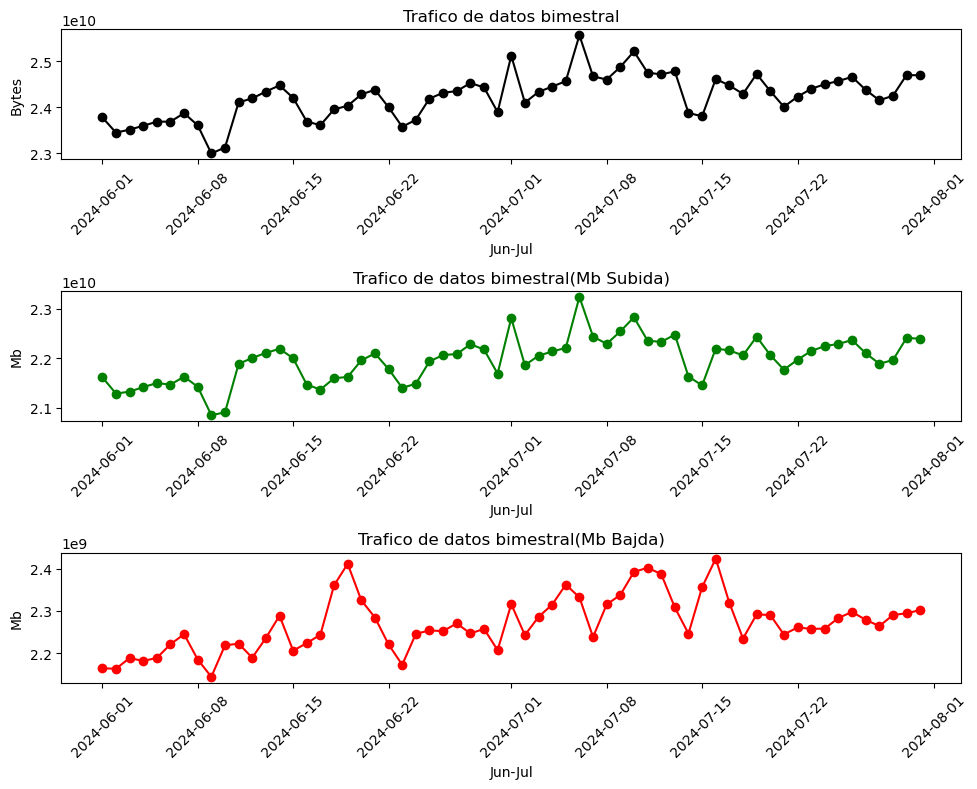

In [27]:
plt.figure(figsize=(10,8))  

plt.subplot(3,1,1)
plt.plot(df_fechaT, marker='o', color='black')
plt.title('Trafico de datos bimestral')
plt.xlabel('Jun-Jul')
plt.ylabel('Mb')
plt.xticks(rotation=45) 

plt.subplot(3,1,2)
plt.plot(df_fechadl, marker='o', color='green')
plt.title('Trafico de datos bimestral(Mb Subida)')
plt.xlabel('Jun-Jul')
plt.ylabel('Mb')
plt.xticks(rotation=45) 

plt.subplot(3,1,3)
plt.plot(df_fechaul, marker='o', color='red')
plt.title('Trafico de datos bimestral(Mb Bajda)')
plt.xlabel('Jun-Jul')
plt.ylabel('Mb')
plt.xticks(rotation=45) 



plt.tight_layout()
plt.show()